## Insertion Sort

In [10]:
def insertion_sort(array, key= lambda x: x):
    '''sorts array (inplace) in non decreasing order based on comparision via function key'''
    
    for i in range(1, len(array)):
        j = i
        curr = array[i]
        # shift cuur to a positon so array[0: i + 1] becomes sorted
        while key(curr) < key(array[j - 1]):
            array[j], array[j-1] = array[j-1], array[j]
            j -= 1
            # check for out of bound
            if j == 0:
                break
    # returns nothing, modifies array inplace
    return
    

In [35]:
l = [-1, 0, 4, -2, -1, 4]

In [38]:
insertion_sort(l, key = lambda x: -x)

In [39]:
l

[4, 4, 0, -1, -1, -2]

In [44]:
la = list('asbBsadz')

In [45]:
insertion_sort(la)
la

['B', 'a', 'a', 'b', 'd', 's', 's', 'z']

In [46]:
insertion_sort(la, key = lambda x: x.lower())
la

['a', 'a', 'B', 'b', 'd', 's', 's', 'z']

## Merge Sort

In [68]:
def merge_sort(array, key=lambda x: x):
    '''sorts array in non decreasing order, compared via key'''
    if len(array) < 2:
        return array
    
    return merge(merge_sort(array[: len(array) // 2], key), merge_sort(array[len(array) // 2 :], key), key)

def merge(arr1, arr2, key):
    '''merges two arrays in non decreasing order(compared via key) and returns new array'''
    merged = []
    i = 0
    j = 0
    # add items from the two arrays to merged array such that merged array remain sorted
    while i < len(arr1) and j < len(arr2):
        if key(arr1[i]) <= key(arr2[j]):
            merged.append(arr1[i])
            i += 1
        else:
            merged.append(arr2[j])
            j += 1
    # add ramaing items from arr1 or arr2 if any
    merged.extend(arr1[i:])
    merged.extend(arr2[j:])

    return merged
    

In [76]:
l = [2, 0, 10, 15, 4, 6]

In [77]:
merge_sort(l, key=lambda x: x % 5)

[0, 10, 15, 6, 2, 4]

In [81]:
la = list('DasdzHzzgZrAFs')
merge_sort(la, key=lambda x: x.lower())

['a', 'A', 'D', 'd', 'F', 'g', 'H', 'r', 's', 's', 'z', 'z', 'z', 'Z']

## Comparison of runtimes

In [94]:
import matplotlib.pyplot as plt
import numpy as np
from time import time

In [112]:
# check for following sizes of array
N = range(100, 1500, 20)

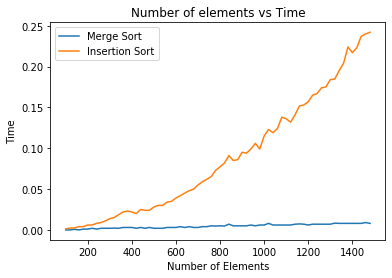

In [113]:
time_ms = []
time_is = []

for n in N:
    array = list(np.random.randint(1000, size=n))
    time1 = time()
    sa1 = merge_sort(array)
    time_ms.append(time() - time1)
    time1 = time()
    insertion_sort(array)
    time_is.append(time() - time1)
    
    if sa1 != array:
        raise Exception("Wrong Ans")

plt.figure()
plt.plot(N, time_ms, label= 'Merge Sort')
plt.plot(N, time_is, label= 'Insertion Sort')
plt.title('Number of elements vs Time')
plt.xlabel('Number of Elements')
plt.ylabel('Time')
plt.legend()

In [97]:
np.random.randint(1000, size=10)

array([763, 828, 551, 840, 722, 529, 187, 574, 353, 882])

In [104]:
type(array)

numpy.ndarray